In [1]:
import pandas as pd

In [7]:
df = pd.read_csv(r'data/iris.csv')
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [14]:
# 划分数据
data = df[df.columns[:4]]
labels = df[df.columns[-1]]

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(data,labels,test_size=0.25,stratify=labels,random_state=14)

In [46]:
from sklearn import tree
import pydotplus
from PIL import Image
def save_DT(model,fn):
    dot_data = tree.export_graphviz(model, out_file=None,
                                    feature_names=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid'],
                                    class_names=['0', '1','2'],
                                    filled=True, rounded=True,
                                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    with open(fn, 'wb') as f:
        f.write(graph.create_png())
    return Image.open(fn)

In [45]:
model = DecisionTreeClassifier()
model.fit(xtrain,ytrain)
pred = model.predict(xtest)
accuracy_score(ytest,pred)

0.9473684210526315

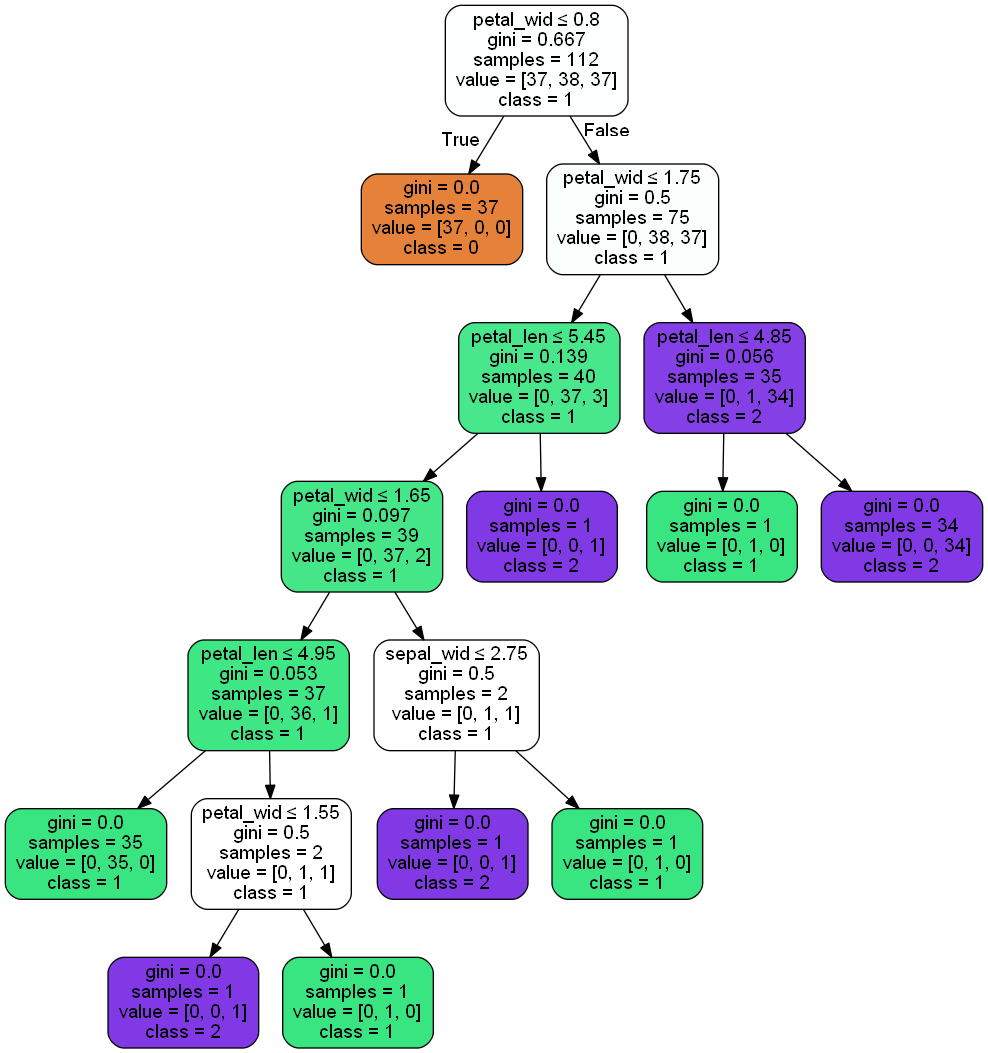

In [47]:
save_DT(model,r'DTree.png')

![决策树重要参数](https://img-blog.csdnimg.cn/20190120111139784.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2ZhbnpvbmdoYW8=,size_16,color_FFFFFF,t_7)

In [50]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(xtrain,ytrain)
pred = model.predict(xtest)
accuracy_score(ytest,pred)

0.8947368421052632

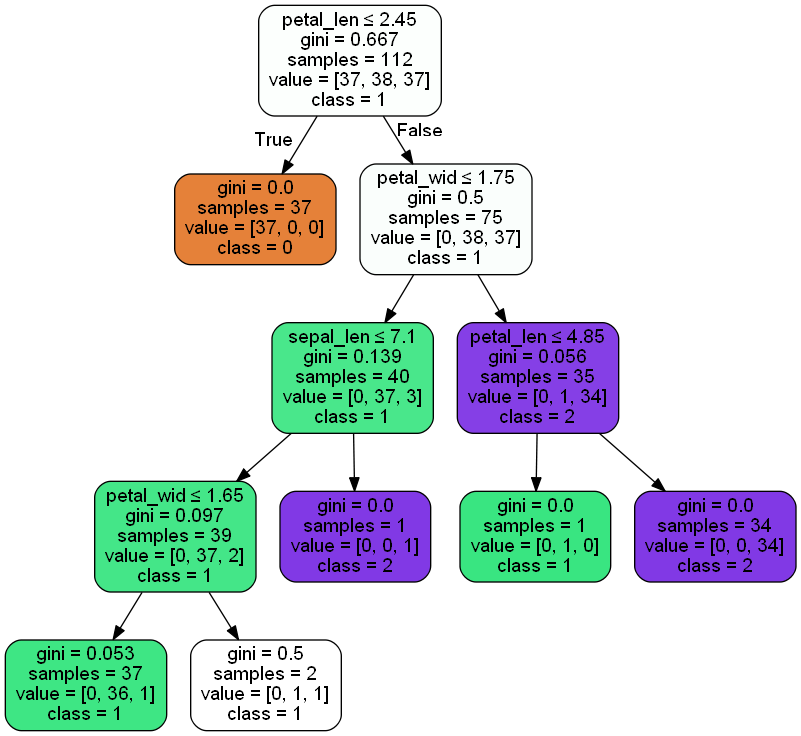

In [51]:
save_DT(model,r'DTree(1).png')